
#<center>-- 시나브로 배우는 자연어처리 실습자료 --</center>
###<p style="text-align:right">발표자 : 송치성(https://www.facebook.com/shuraba)</p>

<hr style="border-color:#ff9900">
# Step 1. NLTK 초간단 실습 : 영문으로된 텍스트를 형태소 분석해보자.
<hr style="border-color:#ff9900">

http://www.nltk.org/

<br>
## 1. 문장 끝(EOS; End Of Sentence) 탐지
- 문서에서 각 문장을 인식

In [1]:
import nltk

In [21]:
txt= "Hello, it's me. I was wondering \
if after all these years. You'd like to \
meet, to go over everything. They \
say that time's supposed to heal ya."
txt

"Hello, it's me. I was wondering if after all these years. You'd like to meet, to go over everything. They say that time's supposed to heal ya."

In [22]:
sentences = nltk.tokenize.sent_tokenize(txt)
sentences

["Hello, it's me.",
 'I was wondering if after all these years.',
 "You'd like to meet, to go over everything.",
 "They say that time's supposed to heal ya."]

<br>
## 2. 토큰화(Tokenization)
- 각각의 문장을 토큰으로 분리.
- 한글의 __형태소__(의미를 가진 최소한의 단위)와 유사한 의미.

In [25]:
tokens = [nltk.tokenize.word_tokenize(sen) for sen in sentences]
tokens

[['Hello', ',', 'it', "'s", 'me', '.'],
 ['I', 'was', 'wondering', 'if', 'after', 'all', 'these', 'years', '.'],
 ['You',
  "'d",
  'like',
  'to',
  'meet',
  ',',
  'to',
  'go',
  'over',
  'everything',
  '.'],
 ['They', 'say', 'that', 'time', "'s", 'supposed', 'to', 'heal', 'ya', '.']]

<br>
## 3. 품사(POS; part-of-speech) 태깅(Tagging)
- 토큰에 품사 부착
- POS에 대한 정보 : http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [27]:
pos_tagged_tokens =[nltk.pos_tag(t) for t in tokens]
pos_tagged_tokens

[[('Hello', 'NNP'),
  (',', ','),
  ('it', 'PRP'),
  ("'s", 'VBZ'),
  ('me', 'PRP'),
  ('.', '.')],
 [('I', 'PRP'),
  ('was', 'VBD'),
  ('wondering', 'VBG'),
  ('if', 'IN'),
  ('after', 'IN'),
  ('all', 'DT'),
  ('these', 'DT'),
  ('years', 'NNS'),
  ('.', '.')],
 [('You', 'PRP'),
  ("'d", 'MD'),
  ('like', 'VB'),
  ('to', 'TO'),
  ('meet', 'VB'),
  (',', ','),
  ('to', 'TO'),
  ('go', 'VB'),
  ('over', 'IN'),
  ('everything', 'NN'),
  ('.', '.')],
 [('They', 'PRP'),
  ('say', 'VBP'),
  ('that', 'IN'),
  ('time', 'NN'),
  ("'s", 'POS'),
  ('supposed', 'VBN'),
  ('to', 'TO'),
  ('heal', 'VB'),
  ('ya', 'NN'),
  ('.', '.')]]

<hr style="border-color:#ff9900">
# Step 2. KonlPy 간단 실습 : 한글도 다뤄보자.
<hr style="border-color:#ff9900">

<br>
## 1. 한글 텍스트 데이터 불러오기

- 실습할 데이터 : Naver sentiment movie corpus v1.0 
- 네이버 영화 리뷰 데이터
- 링크 : https://github.com/e9t/nsmc

In [4]:
# 데이터 다운로드. 
# ratings_test.txt : 50000개의 리뷰데이터
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

--2015-12-19 03:05:26--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com... 103.245.222.133
Connecting to raw.githubusercontent.com|103.245.222.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [text/plain]
Saving to: 'ratings_test.txt'

ratings_test.txt    100%[=====================>]   4.67M  7.68MB/s   in 0.6s   

2015-12-19 03:05:30 (7.68 MB/s) - 'ratings_test.txt' saved [4893335/4893335]



In [1]:
import pandas as pd
from konlpy.utils import pprint

In [2]:
korean_review_df = pd.read_csv( "ratings_test.txt", header=0, delimiter="\t", quoting=3, encoding="utf-8" )

In [3]:
# 제대로 읽혔는지 확인
len(korean_review_df) # 50000개의 리뷰데이터   

50000

In [4]:
# 읽은 리뷰데이터셋 확인
korean_review_df[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 데이터셋의 컬럼 설명
- id : 각 리뷰의 id
- document : 실제 리뷰의 내용. __(이번에는 이것만 다룸.)__
- label : 각 리뷰에 부착된 긍부정 의견. (0: 부정, 1: 긍정)

<br>
## 2. 트위터 형태소 분석기로 품사 태깅(POS Tagging)

- 트위터 형태소 분석기가 한글 통신어체 처리에 좋음.
- 트위터 형태소 분석기 설명 : https://github.com/twitter/twitter-korean-text

In [5]:
from konlpy.tag import Twitter
twi_tagger = Twitter()

- Korean POS tags comparison chart : https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [9]:
# 트위터 형태소 분석기 테스트
temp_sen = u"마늘치킨이 먹고싶닼ㅋㅋ 치킨 사랑해~"
# 한글 깨지기 때문에 pprint 함수 사용하여 한글 출력.
pprint(twi_tagger.pos(temp_sen, norm=True, stem=True))

[(마늘, Noun),
 (치킨, Noun),
 (이, Josa),
 (먹다, Verb),
 (ㅋㅋ, KoreanParticle),
 (치킨, Noun),
 (사랑, Noun),
 (하다, Verb),
 (~, Punctuation)]


In [10]:
# 트위터 형태소 분석기로 리뷰 형태소 분석 테스트
words_temp = twi_tagger.pos(korean_review_df["document"][3], norm=True, stem=True)

In [11]:
pprint(words_temp)

[(지루하다, Adjective),
 (않다, Verb),
 (완전, Noun),
 (막장, Noun),
 (임, Noun),
 (..., Punctuation),
 (돈, Noun),
 (주다, Verb),
 (보기, Noun),
 (에는, Josa),
 (...., Punctuation)]


<br>
## 3. 어떤 단어가 많이 사용되었는지 단어 빈도 플롯 살펴보기
- 참고 : https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

In [12]:
# Load the punkt tokenizer
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer

In [13]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

In [14]:
# (돈, Noun) -> "돈/Noun" 형태로 형태소 분석.
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [15]:
# 리뷰 단어 리스트 형태로 만듦.
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError, e:
        print e
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [17]:
words=[]
review_num=0
for review in korean_review_df["document"]:
    words += review_to_wordlist(review)
    review_num += 1
    if review_num%5000==0:
        print "review_num : %d" % (review_num)

review_num : 5000
'float' object has no attribute 'strip'
'float' object has no attribute 'strip'
review_num : 10000
review_num : 15000

/Users/Chad/Desktop/venv/lib/python2.7/site-packages/bs4/__init__.py:182: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  '"%s" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.' % markup)
/Users/Chad/Desktop/venv/lib/python2.7/site-packages/bs4/__init__.py:182: UserWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  '"%s" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.' % markup)



review_num : 20000
review_num : 25000
'float' object has no attribute 'strip'
review_num : 30000
review_num : 35000
review_num : 40000
review_num : 45000
review_num : 50000


In [18]:
# 총 단어(토큰) 갯수
len(words)

734196

In [19]:
pprint(words[:10])

[굳다/Adjective,
 ㅋ/KoreanParticle,
 GDNTOPCLASSINTHECLUB/Alpha,
 뭐/Noun,
 야/Josa,
 이/Noun,
 평점/Noun,
 들/Suffix,
 은/Josa,
 ..../Punctuation]


In [20]:
import nltk

In [21]:
words_nltk = nltk.Text(words, name="words in movie reviews")

In [22]:
# 많이 쓰인 단어 보여줌. 상위 10개의 단어.
pprint(words_nltk.vocab().most_common(10))

[(./Punctuation, 22902),
 (영화/Noun, 17494),
 (하다/Verb, 16778),
 (이/Josa, 13288),
 (보다/Verb, 11654),
 (의/Josa, 10228),
 (../Punctuation, 9590),
 (에/Josa, 9261),
 (가/Josa, 8918),
 (을/Josa, 7767)]


In [28]:
import matplotlib
matplotlib.rc('font',family='AppleGothic') # 기본 폰트로는 한글 폰트가 깨지기 떄문에 임의로 지정해줌. 

In [30]:
%matplotlib inline # Jupyter 노트북에 플롯 표시해줌.

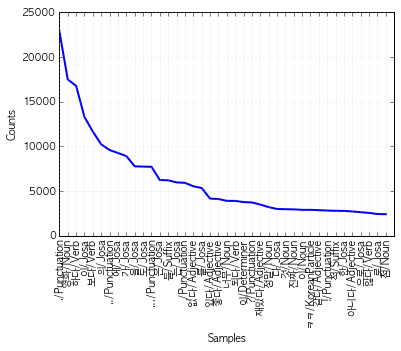

In [46]:
words_nltk.plot(40) # 가장 많이쓰인 상위 40개의 단어

### Naive하게 불용어(stop words)처리
- 조사(~에, ~로), 구두점(.)같은 의미없는 단어들 제거. 

In [49]:
# 품사 중 명사, 동사, 형용사, 부사, 감탄사(헐, 어머나), 한국어약어(ㅋㅋㅋ) 만 추출해봄.
Non_Stop_words = ["Noun", "Verb","Adjective","Adverb","Exclamation","KoreanParticle"]

In [48]:
words_new = [w for w in words if w.split("/")[-1] in Non_Stop_words]
pprint(words_new[:10])

[굳다/Adjective,
 ㅋ/KoreanParticle,
 뭐/Noun,
 이/Noun,
 평점/Noun,
 나쁘다/Adjective,
 않다/Verb,
 점/Noun,
 짜다/Verb,
 리/Noun]


In [50]:
words_nltk_new = nltk.Text(words_new, name="new words in movie reviews")

In [52]:
# 많이 쓰인 단어 보여줌. 상위 10개의 단어.
pprint(words_nltk_new.vocab().most_common(10))

[(영화/Noun, 17494),
 (하다/Verb, 16778),
 (보다/Verb, 11654),
 (없다/Adjective, 5535),
 (있다/Adjective, 4150),
 (좋다/Adjective, 4108),
 (너무/Noun, 3902),
 (되다/Verb, 3894),
 (재밌다/Adjective, 3487),
 (정말/Noun, 3201)]


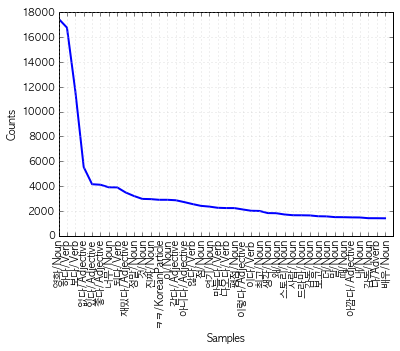

In [54]:
words_nltk_new.plot(40) # 가장 많이쓰인 상위 40개의 단어

<hr style="border-color:#ff9900">
# Step 3. Word2vec 실습 : 벡터 표현도 해보자.
<hr style="border-color:#ff9900">

<br>
## 0. 단어 불러오기 (대학생 커뮤니티에서 크롤링한 전처리된 텍스트 데이터)

- 대학생 커뮤니티에서 수집한 174만개의 문장을 Step2에서의 방법으로 형태소 분석하고, 단어의 리스트 포맷으로 만듦.  
- 포맷 : [ ["word1/pos1", "word2/pos2", "word3/pos3", ... ], ["word4/pos4", "word5/pos5", ... ], ... ] 
- __사정상 데이터는 공개 불가 ㅜ__

In [55]:
import pickle
with open('sentences_d_twi_stopwordsoff.txt', 'rb') as f:   
    sentences = pickle.load(f)

In [86]:
pprint(sentences[:10])

[[연하남/Noun,
  좋아하다/Adjective,
  것/Noun,
  같다/Adjective,
  저/Noun,
  학년/Noun,
  그/Noun,
  친구/Noun,
  학년/Noun],
 [성격/Noun,
  자다/Verb,
  맞다/Verb,
  대외/Noun,
  활동/Noun,
  끝나다/Verb,
  그/Noun,
  친구/Noun,
  저/Noun,
  두/Noun,
  달/Noun,
  넘다/Verb,
  따로/Adverb,
  만나다/Verb,
  밥/Noun,
  먹다/Verb,
  영화/Noun,
  보고/Noun,
  자주/Noun,
  만나다/Verb],
 [춥다/Noun,
  하다/Verb,
  옷/Noun,
  벗다/Verb,
  손/Noun,
  잡다/Verb,
  호호/Noun,
  불어/Noun,
  주기도/Noun,
  하다/Verb],
 [연락/Noun,
  거의/Noun,
  매일/Noun,
  사귀다/Verb,
  말/Noun,
  하다/Verb,
  것/Noun,
  보다/Verb,
  그냥/Noun,
  좋다/Adjective,
  누나/Noun,
  로만/Noun,
  보다/Verb,
  걸다/Verb,
  요/Noun,
  어느새다/Adjective,
  동생/Noun,
  아니다/Adjective,
  남자/Noun,
  보이다/Verb,
  대놓고/Adverb,
  말/Noun,
  하다/Verb,
  용기/Noun,
  안나/Noun,
  남자/Noun,
  여자/Noun,
  먼저/Noun,
  고백/Noun,
  하다/Verb,
  매력/Noun,
  떨어지다/Verb,
  그렇다/Adjective],
 [말/Noun,
  하다/Verb,
  않다/Verb,
  내/Noun,
  널/Noun,
  좋아하다/Adjective,
  걸/Noun,
  표현/Noun,
  하다/Verb,
  방법/Noun,
  없다/Adjective],
 [안녕하다/Adjective],
 [자취/Noun,
  있다/Adj

In [57]:
len(sentences) # 총 174만개의 문장

1741326

<br>
## 1. Gensim을 이용하여 word2vec 모델링

In [74]:
from gensim.models import word2vec

In [104]:
# Set parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 8       # Number of threads to run in parallel
context = 3          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
negative = 5
iter = 20 # 얼마나 반복할지.

In [105]:
# 오오오오오래 걸립니다.
import time
start = time.time(); # 작업시간 검사용!
# Initialize and train the model (this will take some time)
print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, negative=negative, iter=iter)
end = time.time();
print end-start

Training model...
5492.93988991


In [346]:
model.init_sims(replace=True)

In [106]:
# 모델 이름 지정과 저장.
#model_name = "300features_40minwords_10context_twi2"
#model.save(model_name)

In [75]:
# 모델 로드.
# model_w2v = word2vec.Word2Vec.load("300features_40minwords_10context_twi2")

In [76]:
model_w2v.init_sims(replace=True)

In [349]:
model_w2v.syn0.shape

(15365, 300)

In [358]:
pprint(model_w2v.index2word)

[말뚝/Noun,
 주도/Noun,
 통닭/Noun,
 어빠/Noun,
 나라/Noun,
 이또/Noun,
 필연/Noun,
 신박/Noun,
 마귀/Noun,
 조상/Noun,
 민아/Noun,
 입냄새/Noun,
 침몰/Noun,
 창피해/Noun,
 지워지다/Verb,
 서서히/Noun,
 참고/Noun,
 땡기다/Verb,
 식지/Noun,
 픈/Noun,
 발병/Noun,
 자책/Noun,
 대가리/Noun,
 고해/Noun,
 철/Noun,
 별다르다/Adjective,
 일이구/Noun,
 업소/Noun,
 다반사/Noun,
 부답/Noun,
 가뭄/Noun,
 ㅇㄴ/KoreanParticle,
 모르다/Verb,
 식권/Noun,
 일본어/Noun,
 슬픔/Noun,
 무말/Noun,
 단백질/Noun,
 알코올/Noun,
 귀신/Noun,
 따윈/Noun,
 바삭/Noun,
 엑소/Noun,
 종종/Noun,
 하이라이트/Noun,
 말라가/Noun,
 성균관대/Noun,
 회계사/Noun,
 쪼가리/Noun,
 그래프/Noun,
 그으다/Verb,
 실종/Noun,
 퀴어/Noun,
 엎/Noun,
 계기/Noun,
 겹/Noun,
 허허/Adverb,
 촉/Noun,
 오기/Noun,
 표준/Noun,
 반짝거리다/Verb,
 스승의날/Noun,
 마음대로/Noun,
 수목/Noun,
 이상은/Noun,
 퇴사/Noun,
 ㄱㅁㅅ/KoreanParticle,
 출제/Noun,
 곱등이/Noun,
 가관/Noun,
 쏜다/Noun,
 뿌리/Noun,
 합격/Noun,
 설상가상/Noun,
 현상/Noun,
 뒤따르다/Verb,
 핫팬츠/Noun,
 고딩/Noun,
 제어/Noun,
 광역버스/Noun,
 짤린/Noun,
 서요/Noun,
 힘차다/Adjective,
 아이야/Noun,
 필사/Noun,
 채택/Noun,
 사치/Noun,
 충주/Noun,
 어가/Noun,
 다집/Noun,
 피부/Noun,
 릉/Noun,
 재회/Noun,


<br>
## 2. word2vec 모델 갖고 놀기

In [395]:
# 만들어진 word2vec 모델 내에서 '취업'과 가까운(유사한) 상위 10개의 단어는? 
pprint(model_w2v.most_similar(positive=[u'취업/Noun'], topn=10))

[(취직/Noun, 0.8068336844444275),
 (졸업/Noun, 0.5646950006484985),
 (대학원/Noun, 0.5612005591392517),
 (진로/Noun, 0.5321317315101624),
 (대기업/Noun, 0.525084376335144),
 (진학/Noun, 0.5242314338684082),
 (스펙/Noun, 0.4993385076522827),
 (취준생/Noun, 0.48712578415870667),
 (취준/Noun, 0.4847239851951599),
 (공기업/Noun, 0.47719287872314453)]


In [396]:
# '끼부리다'와 가까운 상위 10개의 단어는?
pprint(model_w2v.most_similar(positive=u'끼부리다/Adjective', topn=10))

[(철벽/Noun, 0.39050883054733276),
 (여우/Noun, 0.3863976001739502),
 (어장/Noun, 0.37865474820137024),
 (여자후배/Noun, 0.3712746798992157),
 (나쁜남자/Noun, 0.3340104818344116),
 (스킨십/Noun, 0.32896384596824646),
 (꼬리/Noun, 0.3282308578491211),
 (친한척/Noun, 0.3281872570514679),
 (나대다/Verb, 0.3261522948741913),
 (여후/Noun, 0.3258897066116333)]


In [397]:
# '미국'과 가까운 상위 5개의 단어는?
pprint(model_w2v.most_similar(positive=u'미국/Noun', topn=5))

[(일본/Noun, 0.6754751801490784),
 (영국/Noun, 0.6259884834289551),
 (외국/Noun, 0.6108527183532715),
 (한국/Noun, 0.6050620675086975),
 (중국/Noun, 0.6048676371574402)]


In [398]:
# 다음 중 다른 하나는? (미국,일본,중국은 국가인 반면, 서울은 도시)
pprint(model_w2v.doesnt_match(u'미국/Noun 일본/Noun 서울/Noun 중국/Noun'.split()))

서울/Noun


In [399]:
# 벡터연산 테스트.
# 어머니 - 엄마 = ??? - 아빠
pprint(model_w2v.most_similar(positive=[u'어머니/Noun',u'아빠/Noun'], negative=[u'엄마/Noun'], topn=1))

[(아버지/Noun, 0.8476478457450867)]


In [400]:
# 대기업 - 기쁘다 = ??? - 슬프다
pprint(model_w2v.most_similar(positive=[u'대기업/Noun',u'슬프다/Adjective'], negative=[u'기쁘다/Adjective'], topn=1))

[(중소기업/Noun, 0.5176644325256348)]


<br>
## 3. t-SNE로 차원축소 및 시각화

- 앞서 만든 word2vec 모델은 기존 1-hot 벡터표현법에 비해 차원(dimension)이 상당히 줄어들었지만, 그래도 300차원..
- 이를 평면상에 시각화해보기 위해서는 t-SNE를 이용하여 차원을 2차원으로 축소해야함.
- t-SNE는 scikit-learn에서 제공.

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [78]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000) 
# 여기서 중요한 것은 n_components만큼 차원을 축소함. Cartarian 좌표계로 시각화하기 위해 2차원으로 축소.

In [79]:
# numpy객체 출력시 소숫점 출력안함
np.set_printoptions(suppress=True)

In [80]:
vectors = model_w2v.syn0
labels = model_w2v.index2word

In [81]:
# 이것도 오오오오오오래걸림...
import time
start = time.time();
vectors_simple = tsne.fit_transform(vectors)
end = time.time();
print end -start

4448.91836095


In [83]:
# 차원축소된 벡터 저장.
#with open('vectors_simple.txt', 'w') as f:
#    pickle.dump(vectors_simple, f)

In [85]:
# 저장된 벡터 불러오기.
#with open('vectors_simple.txt', 'rb') as f:   
#    vectors_simple = pickle.load(f)

In [89]:
from bokeh.plotting import figure, show, output_notebook, output_file


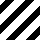
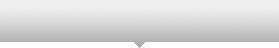
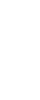
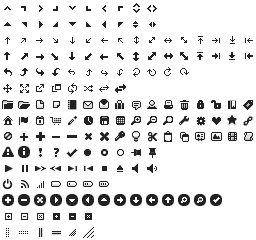
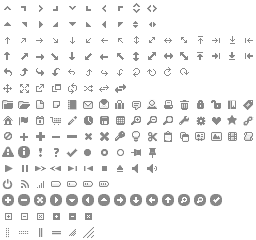
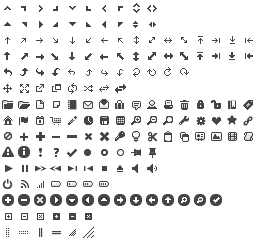
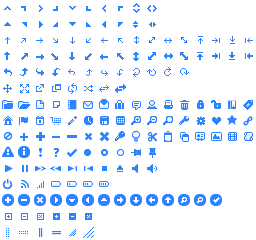
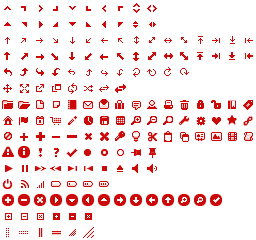
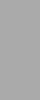
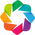
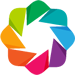
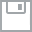
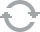
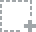
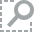
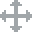
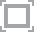
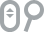

In [90]:
#output_file("word2vec_tsne.html") # 시각화 결과물을 "word2vec_tsne.html" 이름으로 export
output_notebook() # 시각화 결과물을 jupyter 노트북에 보여줌.

In [102]:
from bokeh.models import HoverTool, ColumnDataSource

source = ColumnDataSource(
        data=dict(
            x=vectors_simple.T[0],
            y=vectors_simple.T[1],
            word=labels,
        )
    )


hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("word", "@word"),
        ]
    )
TOOLS = "pan,wheel_zoom,box_zoom,reset,resize"

In [103]:
p = figure(plot_width=700, plot_height=700, tools=[TOOLS,hover], title="Words of Univ Students")
p.circle('x', 'y', size=7, source=source, alpha=0.4, fill_color="red", line_color="#ff9900")

show(p)